In [2]:
'''
This section imports all the modules and 
definitions I commonly use thrroughout most 
notebooks
'''

import sys
sys.path.append('../libraries/')
from libraries_and_definitions import *

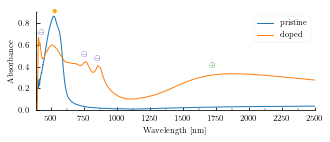

In [3]:
uv_vis = pd.read_csv("UV_Vis_NIR/uvvis_c2_f5.csv",index_col=0, header=0) 
labels=['pristine', 'doped']
plot_absorbance_2(uv_vis,labels)
# annotations in plot –––––––––
plt.annotate("\\textbf{$\ominus$}", xy=(730, 0.5), xycoords="data", fontsize=8, color= 'navy', zorder=20)
plt.annotate("\\textbf{$\ominus$}", xy=(830, 0.46), xycoords="data", fontsize=8, color= 'navy', zorder=20)
plt.annotate("\\textbf{$\\bullet$}", xy=(510, 0.88), xycoords="data", fontsize=11, color= 'orange', zorder=20)
plt.annotate("\\textbf{$\oplus$}", xy=(1700, 0.4), xycoords="data", fontsize=8, color= 'green', zorder=20)
plt.annotate("\\textbf{$\ominus$}", xy=(400, 0.7), xycoords="data", fontsize=8, color= 'navy', zorder=20);
#plt.tight_layout()

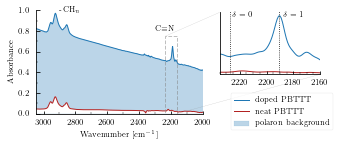

In [3]:
ftir_x = pd.read_csv("IR/ir_x.csv",index_col=None, header=0) 
fig = plt.figure(figsize=(3,1.9), constrained_layout=False)
ax = fig.add_subplot(1, 1, 1,)# yticklabels=[], yticks=[])

#####
ax.plot(ftir_x['wavenumber'],ftir_x['a'],color='tab:blue',lw=1, label='doped PBTTT')
ax.plot(ftir_x['wavenumber'],(ftir_x['j']),color='firebrick',lw=1, label='neat PBTTT')
#####
ax.fill_between(ftir_x['wavenumber'],ftir_x['a'], color= 'tab:blue',alpha=0.3,label='polaron background')
ax.fill_between(ftir_x['wavenumber'],ftir_x['j'], color= 'white',alpha=1,label='',zorder=1)

#####
axins = ax.inset_axes([1.1, 0.38, 0.6, 0.6], yticklabels=[], yticks=[])
axins.patch.set_alpha(0.1)
axins.plot(ftir_x['wavenumber'],(ftir_x['a']*3.4-1.5),color='tab:blue',lw=1, label='doped PBTTT',zorder=1)
axins.plot(ftir_x['wavenumber'],(ftir_x['j']),color='firebrick',lw=1, label='PBTTT',zorder=1)
axins.vlines([2190.5,2227], 0, 2, lw=0.8, ls=':', color='k')
#####
axins.set_xlim(2235,2160)
axins.set_ylim(0,0.75)
ax.indicate_inset_zoom(axins, lw=1,ls='--',label='')
#####
ax.annotate("-$\,$CH$_n$", xy=(2900, 0.98), xycoords="data", fontsize=7.5, color= 'k', zorder=1)
ax.annotate('C$\equiv$N', xy=(2300, 0.8), xycoords="data", fontsize=7.5, color= 'k', zorder=1)
axins.annotate('$\delta=1$', xy=(2188, 0.7), xycoords="data", fontsize=7.8, color= 'k', zorder=1)
axins.annotate('$\delta=0$', xy=(2226, 0.7), xycoords="data", fontsize=7.8, color= 'k', zorder=1)

#####
ax.legend(loc='lower right', prop={'size': 7.6},bbox_to_anchor=(1.8, -0.2))
#####
ax.set_xlabel("Wavenumber [cm$^{-1}$]",)
ax.set_ylabel("Absorbance",)
ax.set_xlim(3050,2000)
ax.set_ylim(0,1);

ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
axins.xaxis.set_minor_locator(MultipleLocator(5))



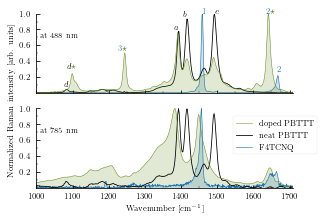

In [5]:
stack_485 = pd.read_csv("Raman/lambda_485nm.csv",index_col=None, header=0 ) #skiprows = 1)
stack_785 = pd.read_csv("Raman/lambda_785nm.csv",index_col=None, header=0 ) #skiprows = 1)
fig = plt.figure(figsize=(4.6,3.2), constrained_layout=False)
ax = fig.add_subplot(2, 1, 1,xticklabels=[])# yticklabels=[], yticks=[])
ax.plot((stack_485['v_t0']),(stack_485['t0']),lw=0.5,ls='-',c='olivedrab',alpha=1,label='doped PBTTT',zorder=2)
ax.plot((stack_485['v_ref']),stack_485['pbttt_ref'],lw=0.8,ls='-',c='k',alpha=1,label='PBTTT',zorder=1)
ax.plot((stack_485['v']),stack_485['f4tcnq_ref'],lw=0.6,ls='-',c='tab:blue',alpha=1,label='F4TCNQ',zorder=0)

ax.fill_between((stack_485['v']),stack_485['f4tcnq_ref'], color= 'tab:blue',alpha=0.2,label='')
# ax.fill_between((stack_485['v_ref']),stack_485['pbttt_ref'], color= 'k',alpha=0.3,label='',zorder=1)
ax.fill_between((stack_485['v_t0']),(stack_485['t0']), color= 'olivedrab',alpha=0.2,label='',zorder=2)

####
ax.set_ylabel('',)
ax.set_xlabel('',)
ax.set_xlim(1000,1710)
ax.set_ylim(0.00001,1)

####
ax1 = fig.add_subplot(2, 1, 2,)# yticklabels=[], yticks=[])
ax1.plot((stack_785['v_t0']),stack_785['t0'],lw=0.5,ls='-',c='olivedrab',alpha=1,label='doped PBTTT',zorder=2)
ax1.plot((stack_785['v_pbttt_ref']),stack_785['pbttt_ref'],lw=0.8,ls='-',c='k',alpha=1,label='neat PBTTT',zorder=1)
ax1.plot((stack_785['v_f4tcnq_ref']),stack_785['f4tcnq_ref'],lw=0.6,ls='-',c='tab:blue',alpha=1,label='F4TCNQ',zorder=0)

ax1.fill_between((stack_785['v_f4tcnq_ref']),stack_785['f4tcnq_ref'], color= 'tab:blue',alpha=0.2,label='')
# ax.fill_between((stack_485['v_ref']),stack_485['pbttt_ref'], color= 'k',alpha=0.3,label='',zorder=1)
ax1.fill_between((stack_785['v_t0']),stack_785['t0'], color= 'olivedrab',alpha=0.2,label='',zorder=0)
####
ax1.set_ylabel('')
ax1.set_xlabel('Wavenumber [cm$^{-1}$]')
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax1.set_xlim(1000,1710)
ax1.set_ylim(0.00001,1)
###
ax.annotate("at 488 nm", xy=(1010, 0.7), xycoords="data", fontsize=7.5, color= 'k', zorder=20)
ax1.annotate("at 785 nm", xy=(1010, 0.7), xycoords="data", fontsize=7.5, color= 'k', zorder=20)

ax.annotate("$2$", xy=(1665, 0.27), xycoords="data", fontsize=7.6, color= 'tab:blue', zorder=0)
ax.annotate("$1$", xy=(1457, 1), xycoords="data", fontsize=7.6, color= 'tab:blue', zorder=0)
ax.annotate("$a$", xy=(1380, 0.8), xycoords="data", fontsize=7.6, color= 'k', zorder=0)
ax.annotate("$b$", xy=(1405, 0.96), xycoords="data", fontsize=7.6, color= 'k', zorder=0)
ax.annotate("$c$", xy=(1493, 1), xycoords="data", fontsize=7.6, color= 'k', zorder=0)
ax.annotate("$\\star$", xy=(1095, 0.30), xycoords="data", fontsize=10, color= 'olivedrab', zorder=0)
ax.annotate("$\\star$", xy=(1645, 1), xycoords="data", fontsize=10, color= 'olivedrab', zorder=0)
ax.annotate("$\\star$", xy=(1237, 0.53), xycoords="data", fontsize=10, color= 'olivedrab', zorder=0)
ax.annotate("$3$", xy=(1225, 0.53), xycoords="data", fontsize=7.6, color= 'tab:blue', zorder=0)
ax.annotate("$2$", xy=(1635, 1), xycoords="data", fontsize=7.6, color= 'tab:blue', zorder=0)
ax.annotate("$d$", xy=(1085, 0.30), xycoords="data", fontsize=7.6, color= 'k', zorder=0)
ax.annotate("$d$", xy=(1076, 0.08), xycoords="data", fontsize=7.6, color= 'k', zorder=0)

ax1.legend(loc='upper left',bbox_to_anchor=(0.75, 0.95))
ax1.yaxis.set_minor_locator(MultipleLocator(0.1))
ax1.xaxis.set_minor_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(50))

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("")
plt.ylabel("Normalized Raman intensity [arb. units]");

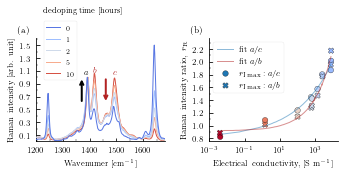

In [10]:
# /Users/Zapata/Documents/OneDrive/python_projects/k_s/
sigma_from_calibration_curve = pd.read_csv("Raman/sigma_from_calibration_curve.csv",index_col=None, header=0)
calibration_curve = pd.read_csv("Raman/calibration_curve.csv", header=0 ) #skiprows = 1)
import matplotlib.colors as colors


######################################################################################################################
fig = plt.figure(figsize=(5.4,1.9), constrained_layout=False)
ax0 = fig.add_subplot(1, 2, 1)
cmap = plt.cm.get_cmap('coolwarm_r')

rgba = cmap(0.5)
# print(rgba) 

ax0 =sigma_from_calibration_curve.plot('freq_c0', 'c0',ax=ax0, zorder=4,lw=1, legend=False,c=cmap(0.9),label='0')
ax0 =sigma_from_calibration_curve.plot('freq_c5', 'c5',ax=ax0, zorder=1,lw=1,legend=False,c=cmap(0.7),label='1')
ax0 =sigma_from_calibration_curve.plot('fre_c1', 'c1',ax=ax0, zorder=3,lw=1,legend=False,c=cmap(0.55),label='2')
ax0 =sigma_from_calibration_curve.plot('freq_c2', 'c2',ax=ax0, zorder=2,lw=1,legend=False,c=cmap(0.3),label='5')
ax0 =sigma_from_calibration_curve.plot('freq_c10', 'c10',ax=ax0, zorder=0,lw=1,legend=False,c=cmap(0.1),label='10')

ax0.legend(['0','1','2','5','10'],loc="upper left", prop={'size': 7},bbox_to_anchor=(0.03, 1.2));
ax0.annotate("dedoping time [hours]", xy=(0.05, 1.25), xycoords="axes fraction", fontsize=8, color= 'k', zorder=20)
ax0.annotate("$c$", xy=(1488, 1.05), xycoords="data", fontsize=8, color= 'firebrick', zorder=20)
ax0.annotate("$b$", xy=(1413, 1.08), xycoords="data", fontsize=8, color= 'firebrick', zorder=20)
ax0.annotate("$a$", xy=(1378, 1.05), xycoords="data", fontsize=8, color= 'k', zorder=20)



ax0.annotate('',
            xy=(1460, 0.6), xycoords='data',
            xytext=(1460, 1), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=3,angleB=90", lw=2, color='firebrick'), zorder=0)
ax0.annotate('',
            xy=(1370, 1), xycoords='data',
            xytext=(1370, 0.6), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=3,angleB=90", lw=2, color='k'), zorder=0)
########################################################################
ax1 = fig.add_subplot(1, 2,2,)# yticklabels=[], yticks=[])
# scatter and line points
c=cal_curve['s_1493']

ax1.scatter((calibration_curve['s_1493']*100), calibration_curve['r_1493'],
                        label='$r\mathrm{_{I\,max}}: a/c$',
                        marker="o",
#                        color='tab:blue',s=18,edgecolor='k',lw='0.35'
            norm=colors.LogNorm(vmin=8E-4, vmax=8400),cmap='coolwarm_r', edgecolor='k',c=c,lw=0.3
           )
ax1.plot((calibration_curve['s_fit_1493']*100),calibration_curve['r_fit_1493'],
                     linewidth=1,
                     linestyle='-',
                     color='tab:blue',
                     alpha=0.5,
                     label='fit $a/c$')
ax1.scatter((calibration_curve['s_1417']*100), calibration_curve['r_1417'],
                        label='$r\mathrm{_{I\,max}}: a/b$',
                        marker="X",
#                        color='red',edgecolor='k',lw='0.38',alpha=0.8
           norm=colors.LogNorm(vmin=8E-4, vmax=8400),cmap='coolwarm_r', edgecolor='k',c=c,lw=0.3
           )
ax1.plot((calibration_curve['s_fit_1417']*100),calibration_curve['r_fit_1417'],
                     linewidth=1,
                     linestyle='-',
                     color='firebrick',
                     alpha=0.5,
                     label='fit $a/b$')

ax1.set_ylabel('Raman intensity ratio, $r\mathrm{_{R}}$')
ax1.set_xlabel('Electrical conductivity, [S m$^{-1}$]')
ax1.set_xscale('log')
ax1.set_xlim(1E-3,2E4)
ax1.set_ylim(0.75,2.37)
ax1.legend(loc='upper left', prop={'size': 8})
####################################################################################################

ax0.set_xlabel("Wavenumer [cm$^{-1}$]")
ax0.set_ylabel("Raman intensity [arb. unit]")
ax0.set_xlim(1200, 1680)
ax0.set_ylim(0, 1.61)

#####################################
# plt.tight_layout()
ax0.annotate("(a)", xy=(-0.15, 1.05), xycoords="axes fraction", fontsize=9, fontweight='bold')
ax1.annotate("(b)", xy=(-0.15, 1.05), xycoords="axes fraction", fontsize=9, fontweight='bold');
# ax2.annotate("(c)", xy=(-0.17, 1.015), xycoords="axes fraction", fontsize=9, fontweight='bold');

ax0.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.sca(ax0)
plt.yticks([0.1,0.3,0.5,0.7,0.9,1.1,1.3,1.5])
ax0.xaxis.set_minor_locator(MultipleLocator(50))
ax0.yaxis.set_minor_locator(MultipleLocator(0.1))
ax0.tick_params(which='both',direction="in",zorder=5)
ax0.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)


plt.sca(ax1)
plt.yticks([0.8,1,1.2,1.4,1.6,1.8,2,2.2])
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax1.yaxis.set_minor_locator(MultipleLocator(0.1))
ax1.tick_params(which='both',direction="in",zorder=5)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)




plt.subplots_adjust(
    wspace = 0.35,  # the amount of width reserved for space between subplots,
                  # expressed as a fraction of the average axis width
#     hspace = 0.2  # the amount of height reserved for space between subplots,
                    )
# plt.tight_layout()

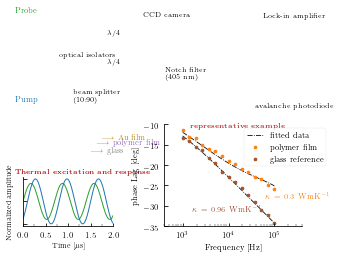

In [14]:
fig = plt.figure(figsize=(5,3.8), constrained_layout=False)
from matplotlib import gridspec #sometimes fails if it is imported in a different cell
 

fdtr_example = pd.read_csv("FDTR/example_fdtr.csv", index_col=None, header = 0) #skiprows = 1)


gs = gridspec.GridSpec(12,12)#,height_ratios=[1,0.25])
ax1 = fig.add_subplot(gs[:9, :12],xticklabels=[],yticklabels=[],yticks=[],xticks=[])
ax2 = fig.add_subplot(gs[9:12, 0:4],yticklabels=[])
ax3 = fig.add_subplot(gs[6:12,6:12])
ax3.patch.set_alpha(0.1)
ax2.patch.set_alpha(0.1)
ax1.patch.set_alpha(0.1)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False) 

xsin=np.linspace(-1,2,200)
ysin=np.sin(xsin*9)
ysin2=np.sin(xsin*9)

ax2.plot(xsin,ysin*0.8,label='probe',color='tab:green',lw=1)
ax2.plot(xsin+0.1,ysin2,label='pump',color='tab:blue',lw=1)
# ax3.legend(loc="best")
ax2.set_xlim(0,2)
ax2.set_xlabel("Time [$\mu$s]",fontsize=7)
ax2.set_ylabel("Normalized amplitude",fontsize=7)
ax2.xaxis.set_minor_locator(MultipleLocator(0.25))
ax2.xaxis.set_major_locator(plt.MaxNLocator(4))



ax3.scatter(fdtr_example['x1'],fdtr_example['y1'],label='polymer film',color='tab:orange',lw=1,s=7,zorder=1)
ax3.plot(fdtr_example['x1b'],fdtr_example['y1b'],label='',color='k',lw=0.8,ls='-.',zorder=0)
ax3.scatter(fdtr_example['x2'],fdtr_example['y2'],label='glass reference',color='sienna',lw=1,s=7,zorder=1)
ax3.plot(fdtr_example['x2b'],fdtr_example['y2b'],label='fitted data',color='k',lw=0.8,ls='-.',zorder=0)
ax3.set_xscale('log')
ax3.set_ylim(-35,-10)
ax3.set_xlim(4E2,4E5)
ax3.legend(bbox_to_anchor=(0.55, 1))
ax3.set_xlabel("Frequency [Hz]")
ax3.set_ylabel("phase Lag [deg]")



ax3.annotate("$\kappa\,$ = 0.96 WmK$^{-1}$ ", xy=(0.2, 0.15), xycoords="axes fraction", fontsize=7.5, color= 'sienna')
ax3.annotate("$\kappa\,$ = 0.3 WmK$^{-1}$ ", xy=(0.73, 0.28), xycoords="axes fraction", fontsize=7.5, color= 'tab:orange')
ax1.annotate("Probe ", xy=(-0.03, 1.05), xycoords="axes fraction", fontsize=8, color= 'tab:green')
ax1.annotate("Pump ", xy=(-0.03, 0.465), xycoords="axes fraction", fontsize=8, color= 'tab:blue')
ax1.annotate("optical isolators ", xy=(0.13, 0.76), xycoords="axes fraction", fontsize=6.8, color= 'k')
ax1.annotate("$\lambda /4$", xy=(0.3, 0.9), xycoords="axes fraction", fontsize=6.5, color= 'k')
ax1.annotate("$\lambda /4$", xy=(0.3, 0.715), xycoords="axes fraction", fontsize=6.5, color= 'k')
ax1.annotate("beam splitter \n(10:90)" , xy=(0.18, 0.47), xycoords="axes fraction", fontsize=6.8, color= 'k')
ax1.annotate("CCD camera" , xy=(0.43, 1.02), xycoords="axes fraction", fontsize=6.8, color= 'k')
ax1.annotate("Notch filter \n(405 nm) " , xy=(0.51, 0.62), xycoords="axes fraction", fontsize=6.8, color= 'k')
ax1.annotate("avalanche photodiode " , xy=(0.83, 0.43), xycoords="axes fraction", fontsize=6.8, color= 'k')
ax1.annotate("Lock-in amplifier" , xy=(0.86, 1.01), xycoords="axes fraction", fontsize=6.8, color= 'k')
ax1.annotate("\\textbf{Thermal excitation and response}" , xy=(-0.03, 0.002), xycoords="axes fraction", fontsize=6.8, color= 'firebrick')
ax1.annotate("\\textbf{$\\longrightarrow$} Au film" , xy=(0.28, 0.23), xycoords="axes fraction", fontsize=7.5, color= 'darkgoldenrod')
ax1.annotate("\\textbf{$\\longrightarrow$} polymer film" , xy=(0.26, 0.19), xycoords="axes fraction", fontsize=7.5, color= 'tab:purple')
ax1.annotate("\\textbf{$\\longrightarrow$} glass " , xy=(0.24, 0.14), xycoords="axes fraction", fontsize=7.5, color= 'tab:gray')
ax1.annotate("\\textbf{representative example}" , xy=(0.6, 0.3), xycoords="axes fraction", fontsize=6.8, color= 'firebrick')


fig.savefig('cover.svg', transparent=True)
fig.savefig('cover.svg', transparent=True)


sc.Figure("14cm", "10.16cm", 
    sc.Panel(sc.SVG("fdtr.svg").scale(0.7).move(20,16)),
    sc.Panel(sc.SVG("cover.svg"))
    ).save("compose.svg")
SVG('compose.svg')